In [85]:

import pandas as pd
df = pd.read_csv('DataSets/car_evaluation.csv')
df.head()



,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,Bad
1,vhigh,vhigh,2,2,small,med,Bad
2,vhigh,vhigh,2,2,small,high,Bad
3,vhigh,vhigh,2,2,med,low,Bad
4,vhigh,vhigh,2,2,med,med,Bad


In [86]:

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,Bad
1,vhigh,vhigh,2,2,small,med,Bad
2,vhigh,vhigh,2,2,small,high,Bad
3,vhigh,vhigh,2,2,med,low,Bad
4,vhigh,vhigh,2,2,med,med,Bad


In [87]:
df.isnull().values.any()

False

In [88]:

df['class'].replace(to_replace=[['Bad'], ['Good']],value=[0,1],inplace=True)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [89]:
def ImbalancePercentage(df):
  bad_count,good_count= 0.0,0.0
  for i in df['class']:
    if i==0:
      bad_count+=1
    else:
      good_count+=1
  sum=bad_count+good_count
  bad_percentage = bad_count/sum
  good_percentage = good_count/sum
  return (bad_percentage-good_percentage)

In [90]:






imbalance=ImbalancePercentage(df)*100.0
print(imbalance)
if imbalance > 30:
  print("Imablance Dataset")
else:
  print("Balance Dataset")

40.0462962962963
Imablance Dataset


In [91]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2)
X_train,y_train

(     buying  maint  doors persons lug_boot safety
 535    high  vhigh  5more    more      med    med
 159   vhigh   high      3    more      big    low
 467    high  vhigh      3       2      big   high
 527    high  vhigh  5more       4      med   high
 952     med  vhigh  5more       2      big    med
 ...     ...    ...    ...     ...      ...    ...
 371   vhigh    low      3    more    small   high
 1042    med   high      4       4      big    med
 373   vhigh    low      3    more      med    med
 1694    low    low      4    more    small   high
 613    high   high      4    more    small    med
 
 [1382 rows x 6 columns],
 535     0
 159     0
 467     0
 527     0
 952     0
        ..
 371     1
 1042    1
 373     1
 1694    1
 613     0
 Name: class, Length: 1382, dtype: int64)

In [92]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [93]:
training_data=X_train.assign(result=y_train)
training_data

,buying,maint,doors,persons,lug_boot,safety,result
535,high,vhigh,5more,more,med,med,0
159,vhigh,high,3,more,big,low,0
467,high,vhigh,3,2,big,high,0
527,high,vhigh,5more,4,med,high,0
952,med,vhigh,5more,2,big,med,0
...,...,...,...,...,...,...,...
371,vhigh,low,3,more,small,high,1
1042,med,high,4,4,big,med,1
373,vhigh,low,3,more,med,med,1
1694,low,low,4,more,small,high,1


In [94]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.shape

(410, 7)

In [95]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.head()

,buying,maint,doors,persons,lug_boot,safety,result
1549,low,med,3,4,small,med,1
1658,low,low,3,4,small,high,1
227,vhigh,med,2,4,small,high,1
1049,med,high,4,more,med,high,1
1040,med,high,4,4,med,high,1


Text(0, 0.5, 'Frequency')

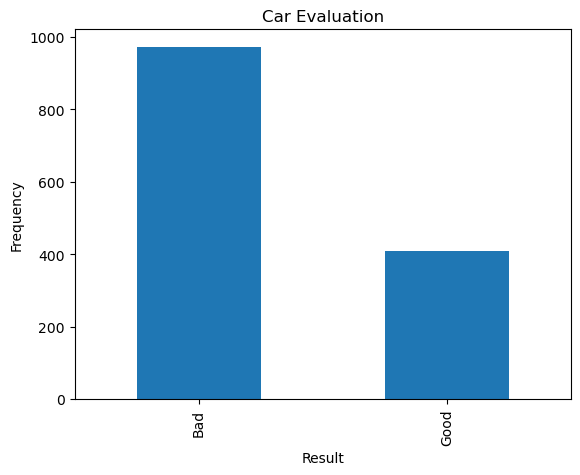

In [96]:

import matplotlib.pyplot as plt
import seaborn as sns



count_classes = pd.value_counts(training_data['result'], sort = True)

count_classes.plot(kind = 'bar')

plt.title("Car Evaluation")
LABELS = ["Bad", "Good"]
plt.xticks(range(2), LABELS)

plt.xlabel("Result")

plt.ylabel("Frequency")

In [99]:
print(training_data.buying.unique())
training_data['buying'].replace(to_replace=[['vhigh'], ['med'], ['low'], ['high']],value=[3,1,0,2],inplace=True)

[2 3 1 0]


In [100]:
print(training_data.maint.unique())
training_data['maint'].replace(to_replace=[['vhigh'], ['med'], ['low'], ['high']],value=[3,1,0,2],inplace=True)

[3 2 1 0]


In [105]:
print(training_data.doors.unique())
training_data['doors'].replace(to_replace=[['2'], ['5more'], ['3'], ['4']],value=[2,5,3,4],inplace=True)

[5 3 4 2]


In [106]:
print(training_data.lug_boot.unique())
training_data['lug_boot'].replace(to_replace=[['small'], ['med'],  ['big']],value=[0,1,2],inplace=True)

[1 2 0]


In [107]:
print(training_data.persons.unique())
training_data['persons'].replace(to_replace=[['2'], ['4'],  ['more']],value=[2,4,6],inplace=True)

[6 2 4]


In [108]:
print(training_data.safety.unique())
training_data['safety'].replace(to_replace=[['high'], ['med'], ['low']],value=[2,1,0],inplace=True)

[1 0 2]


In [109]:
class_majority_df=training_data[training_data['result']==0]
class_majority_df.head()

,buying,maint,doors,persons,lug_boot,safety,result
535,2,3,5,6,1,1,0
159,3,2,3,6,2,0,0
467,2,3,3,2,2,2,0
527,2,3,5,4,1,2,0
952,1,3,5,2,2,1,0


In [110]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.head()

,buying,maint,doors,persons,lug_boot,safety,result
1549,0,1,3,4,0,1,1
1658,0,0,3,4,0,2,1
227,3,1,2,4,0,2,1
1049,1,2,4,6,1,2,1
1040,1,2,4,4,1,2,1


In [111]:
class_majority_df.to_csv("DataSets/car_evaluation_majority.csv")



In [84]:
class_minority_df.to_csv("DataSets/car_evaluation_minority.csv")